# Линейная (и не очень) классификация

Эта домашняя работа состоит из двух частей:

1. В первой части задания вам предстоит узнать, как с помощью [kernel trick](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4) и создания новых признаков превратить ваш линейный классификатор в нелинейный.

2. Во второй части вы попрактикуетесь в отборе гиперпараметров, а также обучите и выберете лучшую модель из всех уже изученных на задаче многоклассовой классификации автомобилей.

##  Часть 1: нелинейные линейные модели

Линейные модели являются одними из простейших, хорошо интерпретируемых и не склонных к переобучению среди всех алгоритмов машинного обучения. Однако их мощности и выразительной способности может не хватать для решения достаточно сложных задач. Ниже вы проиллюстрируете эту проблему на примере задачи бинарной классификации с линейно неразделимыми классами и попробуете решить её доступными методами.

In [3]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Возьмём для демонстрации игрушечный датасет [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html):

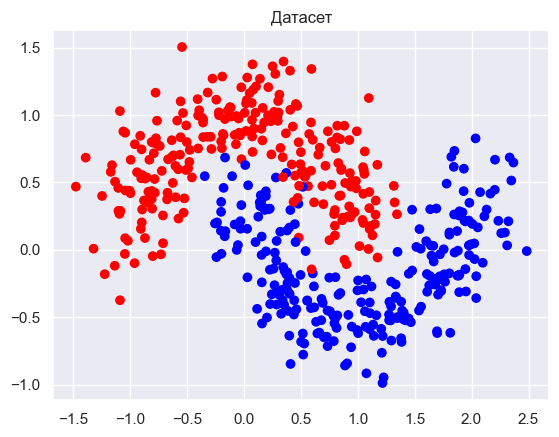

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

class_to_color = {0: 'red', 1: 'blue'}
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=[class_to_color[label] for label in moons_labels])
plt.title('Датасет')
plt.show()

### 1.1 Линейные модели из коробки
Давайте попробуем начать с использования логистической регрессии и метода опорных векторов.

Обучите оба классификатора и нарисуйте решающую поверхность и классифицируемые регионы. **Не забудьте поделить данные на обучающие и тестовые!** Также выберите какую нибудь [метрику](https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics)  классификации и оцените с помощью неё качество на обучающих и тестовых данных. Опишите результаты в одном-двух предложениях.

Подсказка: чтобы нарисовать классифицируемые области вы можете вдохновиться [примерами](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) из sklearn-а или воспользоваться готовой функцией `plot_decision_regions` из пакета [mlxtend](https://github.com/rasbt/mlxtend) (см. примеры по ссылке).

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression()
svm = SVC(kernel='linear')

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(moons_points, moons_labels, test_size=0.2)

logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train_vis, y_train_vis)

svm.fit(X_train_vis, y_train_vis)

SVC(kernel='linear')

In [28]:
from sklearn import metrics

logreg_preds = logreg.predict(X_test_vis)

print('LogReg F1 =', metrics.f1_score(y_test_vis, logreg_preds))

svm_preds = svm.predict(X_test_vis)
print('SVM F1 =', metrics.f1_score(y_test_vis, svm_preds))

LogReg F1 = 0.8411214953271028
SVM F1 = 0.8301886792452831


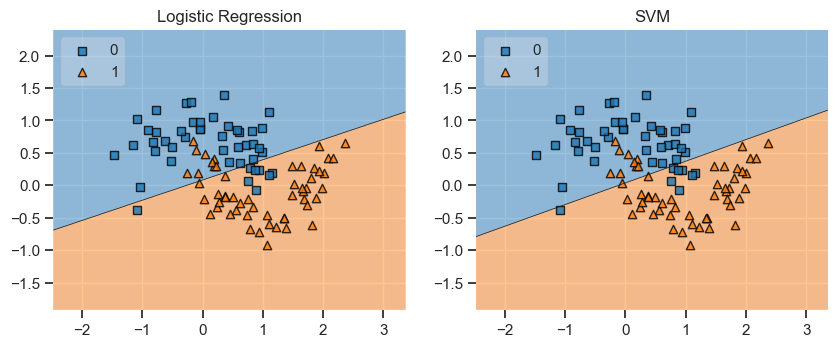

In [29]:
import matplotlib.gridspec as gridspec
import itertools

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([logreg, svm],
                         ['Logistic Regression', 'SVM'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_vis, y=y_test_vis, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Опишите результаты в одном-двух предложениях** 
Обе модели дали примерно одинаковый результат, т.к. обе делали предсказание на основание линейной функции.

### 1.2 Kernel trick

Теперь попробуйте поиграться с кернелами в методе опорных векторов. Используйте различные кернелы (`poly`, `rbf`, `sigmoid`) для получения наилучшего результата.

Для каждого кернела постройте свой график с классифицируемыми регионами и посчитайте ранее выбранную метрику.

Опишите в нескольких предложениях

* Как использование кернелов повлияло на качество классификации?
* Как изменилась решающая поверхность для каждого кернела?

In [30]:
svm_poly = SVC(kernel='poly')
svm_rbf = SVC()
svm_sig = SVC(kernel='sigmoid')

svm_poly.fit(X_train_vis, y_train_vis)
svm_rbf.fit(X_train_vis, y_train_vis)
svm_sig.fit(X_train_vis, y_train_vis)

print('LogReg F1 =', metrics.f1_score(y_test_vis, logreg_preds))
print('SVM F1 =', metrics.f1_score(y_test_vis, svm_preds))

svm_poly_preds = svm_poly.predict(X_test_vis)
print('SVM_Poly F1 =', metrics.f1_score(y_test_vis, svm_poly_preds))

svm_rbf_preds = svm_rbf.predict(X_test_vis)
print('SVM_RBF F1 =', metrics.f1_score(y_test_vis, svm_rbf_preds))

svm_sig_preds = svm_sig.predict(X_test_vis)
print('SVM_Sig F1 =', metrics.f1_score(y_test_vis, svm_sig_preds))

LogReg F1 = 0.8411214953271028
SVM F1 = 0.8301886792452831
SVM_Poly F1 = 0.8947368421052632
SVM_RBF F1 = 0.9719626168224299
SVM_Sig F1 = 0.6306306306306306


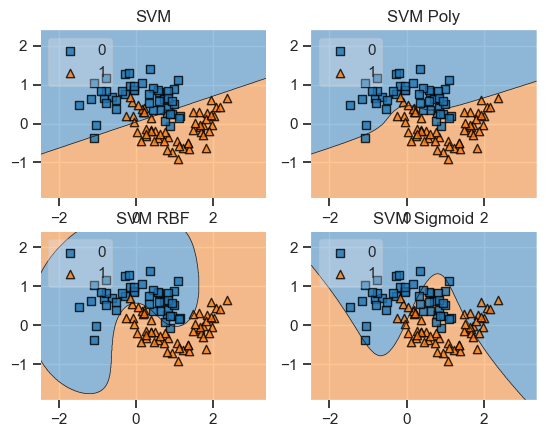

In [32]:
for clf, lab, grd in zip([svm, svm_poly, svm_rbf, svm_sig],
                         ['SVM', 'SVM Poly', 'SVM RBF', 'SVM Sigmoid'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_vis, y=y_test_vis, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### 1.3 Более простое решение
А как можно было бы решить поставленную задачу и построить нелинейную разделяющую поверхность с помощью логистической регрессии? В этом может помочь создание новых признаков. В данном случае вам предлагается добавить признаки, имеющие вид произведений исходных признаков.

За этим стоит простая идея. Решающая поверхность в случае логистической регрессии с двумя признаками задаётся уравнением прямой или, что то же самое, уравнением линии уровня решающей функции со значением 0:
$$ \omega_0 + x_1 \cdot \omega_1 + x_2 \cdot \omega_2 = 0.$$
Если мы добавим объектам признаки $x_1 \cdot x_2$, $x_1^2$, $x_2^2$, то уравнение решающей поверхности примет вид

$$ \omega_0 + x_1 \cdot \omega_1 + x_2 \cdot \omega_2 + x_1 \cdot x_2 \cdot \omega_3 + x_1^2 \cdot \omega_4 + x_2^2 \cdot \omega_5 = 0.$$
Это уравнение задаёт гиперплоскость (линейную разделяющую поверхность) в новом (2 + 3)-мерном пространстве признаков, однако в исходном двумерном пространстве оно задаёт некоторую нелинейную кривую.

Необязательно добавлять в качестве новых признаков именно полиномы от старых признаков. Можно подойти к вопросу творчески и добавлять произвольные нелинейные комбинации признаков: $\log x_1$, $\exp(x_2)$, $\log\left(\dfrac{x_2^2 \cdot x_1 + \pi}{\exp(x_1 \cdot x_2^{0.3}) + 1}\right)$ и т.д. Чем больше сложных нелинейных признаков вы добавите, тем большую мощность обретёт ваша исходно слабая линейная модель. 

В коде ниже добавьте объектам датасета полиномиальные признаки с помощью класса [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) и аналогично предыдущему пункту обучите логистическую регрессию, изобразите классифицируемые области и посчитайте выбранную метрику.

В данном случае с практической точки зрения удобно считать создание новых признаков не этапом работы с данными, а одним из шагов алгоритма. Попробуйте объединить создание полиномиальных признаков и работу классификатора в один алгоритм с помощью [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html). Эта функция может вам понадобиться и во второй части работы.

LogReg poly F1 = 0.9791666666666666


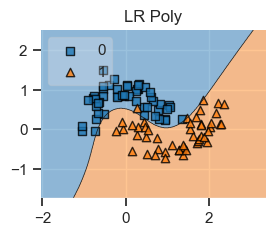

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=123)
pipe = make_pipeline(PolynomialFeatures(3), LogisticRegression(penalty='l2'))


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('LogReg poly F1 =', metrics.f1_score(y_test, y_pred))
for clf, lab, grd in zip([pipe],
                         ['LR Poly'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### 1.4 Более сложная задача

Сделаем задачу чуть сложнее, объединив несколько игрушечных датасетов в один:

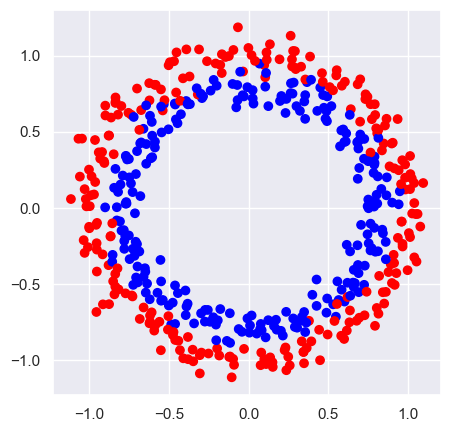

In [98]:
class_to_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=[class_to_color[label] for label in circles_labels])
plt.show()

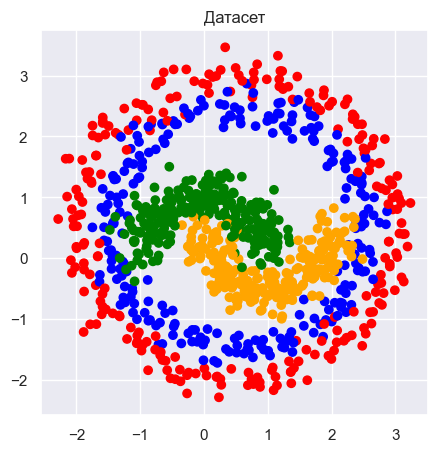

In [99]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=[class_to_color[label] for label in labels])
plt.title('Датасет')
plt.show()

Попробуйте решить эту задачу с помощью подходов, изученных ранее. 

Подберите наилучшие параметры для степени полиномиальных признаков для логистической регрессии и наилучшие параметры для ядер метода опорных векторов.

Также вы можете опробовать на этой задаче другие изученные модели - [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) и [наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Опишите полученные результаты в нескольких предложениях.

c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


LogReg poly F1 = 0.9350697432296647
SVC_RBF F1 = 0.914503182172446
KNN F1 = 0.940353153089108


c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


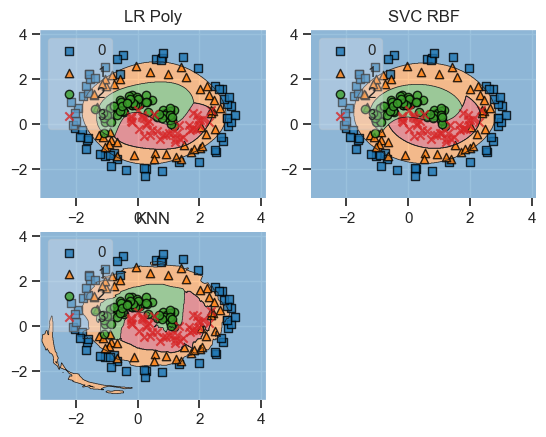

In [128]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=123)
pipe_lr = make_pipeline(PolynomialFeatures(4), LogisticRegression(penalty='l2'))
pipe_svc = make_pipeline(SVC())
pipe_knn = make_pipeline(PolynomialFeatures(4), KNeighborsClassifier(n_neighbors = 3))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('LogReg poly F1 =', metrics.f1_score(y_test, y_pred, average='weighted'))

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
print('SVC_RBF F1 =', metrics.f1_score(y_test, y_pred, average='weighted'))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('KNN F1 =', metrics.f1_score(y_test, y_pred, average='weighted'))
for clf, lab, grd in zip([pipe_lr, pipe_svc, pipe_knn],
                         ['LR Poly', 'SVC RBF', 'KNN'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## Часть 2: подбор гиперпараметров и тюнинг моделей


В этой части задания вы будете работать с датасетом описаний автомобилей.

In [ ]:
# Скачивание данных
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hDbmoa1g-EmtFMgvXWlutY53aC6v53y4' -O car_data.json

Код ниже делит данные на обучающие и тестовые, **не меняйте его!**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Загрузка данных
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f'{len(np.unique(target))} класса: {np.unique(target)}')

Для разведывательного анализа данных удобно использовать библиотеку [pandas](https://pandas.pydata.org/):

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# Покаывает первые 15 строчек датасета
X_train_pd.head(15)

In [ ]:
# Метод `describe` показывает некоторые статистики признаков датасета
# Например он показывает средние значения (mean), стандартные отклонения (std), максимумы (max) и минимумы (min) признаков и другое
X_train_pd.describe()

В качестве метрики выберем `Accuracy`

В качестве бейзлайна давайте возьмём классификатор, предсказывающий самый популярный класс из обучающего датасета

In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score

class MostFrequentClassifier:
    def fit(self, X_train, y_train):
        self.most_frequent_label = Counter(y_train).most_common(1)[0][0]

    def predict(self, X):
        return np.full(X.shape[0], self.most_frequent_label)

baseline_classifier = MostFrequentClassifier()
baseline_classifier.fit(X_train, y_train)

print(f'Accuracy бейзлайна: {accuracy_score(baseline_classifier.predict(X_test), y_test)}')

Всегда важно иметь в арсенале простое, возможно некачественное, но интерпретируемое решение задачи - бейзлайн. Далее при обучении более сложных моделей можно будет отталкиваться от метрики, полученной бейзлайном. Если более сложная модель получила меньшее значение метрики, значит видимо что-то идёт не так и необходимо проанализировать где могла случиться проблема.

### Подбор гиперпараметров

Подбор гиперпараметров - довольно сложная задача, так как обычно гиперпараметры нельзя подобрать сильно более оптимальным образом, чем перебором. В sklearn для подбора гиперпараметров есть [набор](https://scikit-learn.org/stable/api/sklearn.model_selection.html#hyper-parameter-optimizers) простых стратегий, например таких как
* [Поиск по сетке](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#gridsearchcv)
* [Рандомизированный поиск](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

Для более "умного" подбора гиперпараметров существуют специально предназначенные для этого библиотеки, например [optuna](https://optuna.org/).

Давайте попробуем запустить поиск по сетке каких нибудь параметров логистической регрессии:

In [ ]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Словарь "параметр" -> "сетка поиска"
params_to_search = {'C': [0.5, 1, 2], 'penalty': ['l1', 'l2'], 'max_iter': [250, 500]}

# Создаём объект класса `GridSearchCV` - поиска по сетке
# В конструктор класса подаётся классификатор, параметры которого мы будем перебирать и словарь параметров
cv = GridSearchCV(LogisticRegression(solver='saga'), params_to_search)

# Метод `fit` последовательно обучает переданную модель со всеми комбинациями параметров из `params_to_search`
# Оценка комбинации параметров происходит с помощью кросс-валидации по 5 фолдам (можно настраивать это значение)
cv.fit(X_train, y_train)

In [ ]:
# Лучшими значениями параметров считаются те, которые дают наибольший средний `score` модели на обучающей выборке
# Таким образом алгоритм, поданный на вход `GridSearchCV` должен иметь метод `score`, оценивающий его качество
# Для `LogisticRegression` `score`-ом является Accuracy
lr = LogisticRegression(solver='saga')
lr.fit(X_train, y_train)
lr.score(X_test, y_test), accuracy_score(lr.predict(X_test), y_test)

In [ ]:
# У `GridSearchCV` есть метод `predict`, считающий предсказания для модели с наилучшими значениями параметров
y_test_best_model = cv.predict(X_test)

print(accuracy_score(y_test_best_model, y_test))

# Наилучшие значения параметров можно достать так
print(cv.best_params_)

In [ ]:
# Различные результаты перебора гиперпараметров можно достать так
cv.cv_results_

### Покажите класс!

Теперь, зная как подбирать гиперпараметры и обучать модели, попробуйте обучить модель, дающую $\mathbf{\geq 0.85}$ Accuracy на тестовых данных. Вы в праве выбирать любую изученную модель и любые её гиперпараметры. Также вы можете предобрабатывать данные любым образом (нормализовать, генерировать дополнительные признаки и т.д.). Единственное что запрещено - менять то, как данные разделены на трейн и тест и обучаться на тестовых данных.

**Дерзайте!**

In [ ]:
### YOUR CODE HERE